<h1>CAPSTONE TWO: Modeling process</h1>
<p>
    <b>Objective:</b> Body-Fat Prediction<br />
    <b>Date:</b> 08-07-2021<br />
    <b>Author:</b> Ruslan S.<br />
    <b>Types of models:</b>
    <ul>
        <li>DummyRegressor (baseline)</li>
        <li>Linear Regression (OLS)</li>
        <li>Ridge</li>
        <li>Lasso</li>
        <li>ElasticNet</li>
    </ul>
    <b>Tools:</b>
    <ul>
        <li>Pipeline</li>
        <li>GridSearchCV</li>
    </ul>
    <b>Metrics:</b>
    <ul>
        <li>r2_score</li>
        <li>mean_squared_error</li>
    </ul>
</p>

In [1]:
# Importing necessary packages/libraries
import pandas as pd
import numpy as np

# Graphical packages
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import seaborn as sns
sns.set_theme(style="whitegrid")

# Import SKlearn packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Tools
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Metrics
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Load data
path = '../../Data/clear/data_cleaned.csv'
df = pd.read_csv(path)
df

,density,bodyfat,age,weight,height,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
0,1.0708,12.3,23.0,70.0,172.1,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22.0,78.6,183.5,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22.0,69.8,168.3,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26.0,83.8,183.5,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24.0,83.6,181.0,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70.0,60.9,170.2,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72.0,91.2,177.2,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72.0,84.7,167.6,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72.0,86.5,179.1,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


<b>Note</b>: because we do not have categorical variables/features in our dataset, then we will skip the process of creating 'dummies' features.

In [3]:
# Let's look at distribution to understand if you need to apply the standardization process.
def hist_graph(n_rows, n_cols, data_frame):
    n_rows = n_rows
    n_cols = n_cols

    figure(figsize=(11, 9), dpi=80)
    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.6)

    for index, colName in enumerate(data_frame.columns, 1):
        plt.subplot(n_rows, n_cols, index)
        sns.histplot(data=data_frame, x=colName)

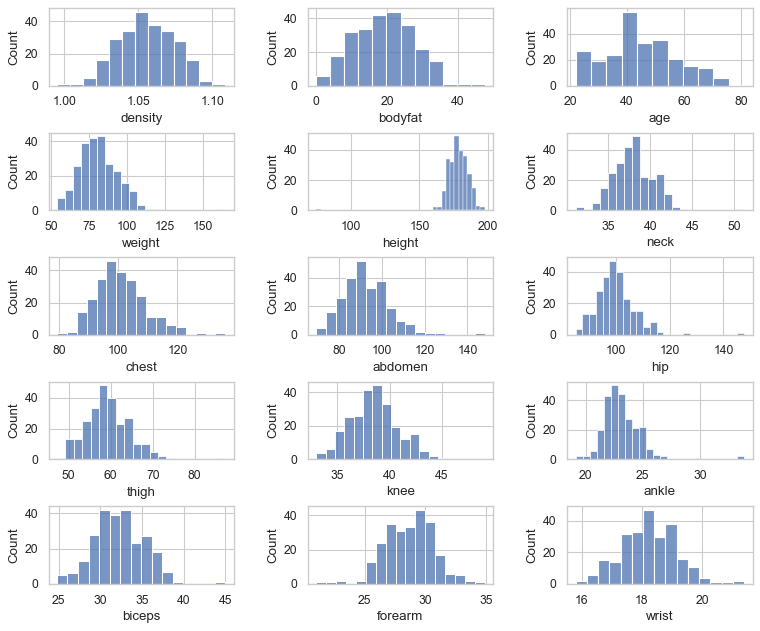

In [4]:
hist_graph(5, 3, df)

<b>Note:</b> as we can see most of our variables/features are evenly distributed, but they are on a different scale. So, we need to apply the Standardization process to fix it before we will fit it into our model. But before we do that we also need to deal with outliers that could negatively affect our prediction later on.  Unfortunately, we do not have much data. It means if we apply the statistical procedure to remove outliers we also will lose some portion of our data. So we will try to fit our model with outliers and without them to see the difference in the performance.

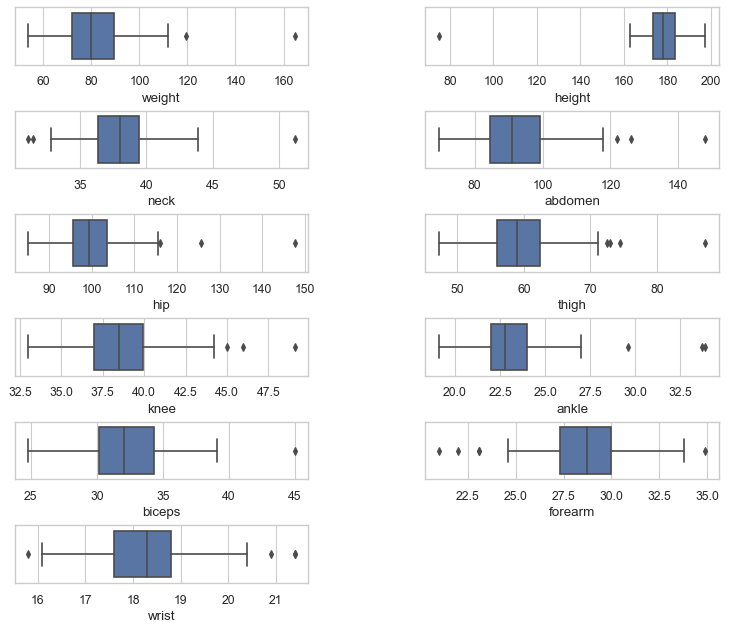

In [5]:
# Removing outliers using a statistical approach
col_names = ['weight', 'height', 'neck',
       'abdomen', 'hip', 'thigh', 'knee', 'ankle', 'biceps', 'forearm',
       'wrist']
n_rows = 6
n_cols = 2

figure(figsize=(11, 9), dpi=80)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.8)

for index, colName in enumerate(col_names, 1):
    plt.subplot(n_rows, n_cols, index)
    sns.boxplot(x=df[colName])

In [6]:
df[col_names].describe()

,weight,height,neck,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,81.143254,178.176587,37.992063,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,13.329454,9.305915,2.430913,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,53.700000,74.900000,31.100000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,72.100000,173.400000,36.400000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,80.050000,177.800000,38.000000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,89.300000,183.500000,39.425000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,164.700000,197.500000,51.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [7]:
# We will remove values that are bigger then 3 std.
def remove_outliers(colName_method, data_frame):
    std = df[colName_method[0]].std()
    mean = df[colName_method[0]].mean()

    cut_off = std * 3
    lower, upper = mean - cut_off, mean + cut_off
    if colName_method[1] == 'l':
        updated_df = data_frame[data_frame[colName_method[0]] > lower]
    elif colName_method[1] == 'r':
        updated_df = data_frame[data_frame[colName_method[0]] < upper]
    else:
        updated_df = data_frame[(data_frame[colName_method[0]] > lower) & (data_frame[colName_method[0]] < upper)]

    print(f"Shape of the original data set before removal outliers: {df.shape}")
    print(f"Shape of the original data set after removal outliers: {updated_df.shape}")
    return updated_df

In [8]:
col_names = [('weight', 'r'), ('height', 'l'), ('neck', 'b'),
       ('abdomen', 'r'), ('hip', 'r'), ('thigh', 'r'), ('knee', 'r'), ('ankle', 'r'), ('biceps', 'r'), ('forearm', 'b'),
       ('wrist', 'b')]
df_no_outliers = df

for i in col_names:
    df_no_outliers = remove_outliers(i, df_no_outliers)

Shape of the original data set before removal outliers: (252, 15)
Shape of the original data set after removal outliers: (251, 15)
Shape of the original data set before removal outliers: (252, 15)
Shape of the original data set after removal outliers: (250, 15)
Shape of the original data set before removal outliers: (252, 15)
Shape of the original data set after removal outliers: (250, 15)
Shape of the original data set before removal outliers: (252, 15)
Shape of the original data set after removal outliers: (249, 15)
Shape of the original data set before removal outliers: (252, 15)
Shape of the original data set after removal outliers: (249, 15)
Shape of the original data set before removal outliers: (252, 15)
Shape of the original data set after removal outliers: (249, 15)
Shape of the original data set before removal outliers: (252, 15)
Shape of the original data set after removal outliers: (248, 15)
Shape of the original data set before removal outliers: (252, 15)
Shape of the orig

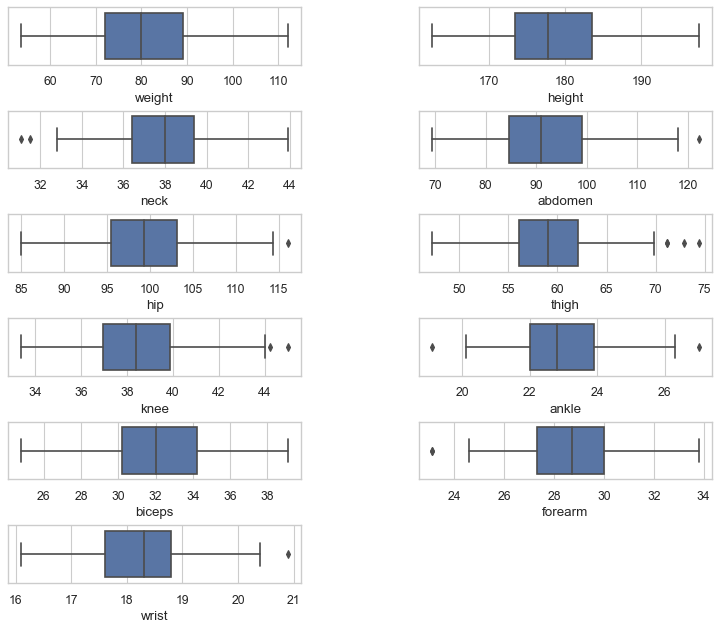

In [9]:
# Let's see the result of data with removing outliers
n_rows = 6
n_cols = 2

figure(figsize=(11, 9), dpi=80)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.8)

for index, colName in enumerate(col_names, 1):
    plt.subplot(n_rows, n_cols, index)
    sns.boxplot(x=df_no_outliers[colName[0]])

In [10]:
print(f"So, as we can see we only lost about {round((1 - (df_no_outliers.shape[0] / df.shape[0])) * 100)}% of our data when we removed outliers.")

So, as we can see we only lost about 4% of our data when we removed outliers.


<b>Note:</b> in case to prevent leaking information we have to split before we standardize our data. 

In [11]:
# Splittig our data
def preparing_to_split(data_frame):
    """Splitting columns"""
    X, y = data_frame.drop(['bodyfat'], axis=1), data_frame['bodyfat']
    print(X.shape, y.shape)
    return X, y

In [12]:
X_1, y_1 = preparing_to_split(df)
X_2, y_2 = preparing_to_split(df_no_outliers)

(252, 14) (252,)
(243, 14) (243,)


In [13]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
print(X_train_1.shape, X_test_1.shape, y_train_1.shape, y_test_1.shape)
print(X_train_2.shape, X_test_2.shape, y_train_2.shape, y_test_2.shape)

(201, 14) (51, 14) (201,) (51,)
(194, 14) (49, 14) (194,) (49,)


In [14]:
# Time for Standardization 
# We will apply this process on two data frames as we discusses before to see the difference on the prediction results
# The first data frame we are appying this process is our original (WITH OUTLIERS)
def scalling_process(X_train, X_test, y_train, y_test):
    """Scale the data"""
    SS_scaler = StandardScaler()
    
    df_temp_1 = pd.concat([X_train, y_train], axis=1)
    df_temp_2 = pd.concat([X_test, y_test], axis=1)
    
    df_temp_1 = SS_scaler.fit_transform(df_temp_1)
    df_temp_2 = SS_scaler.transform(df_temp_2)
    
    return df_temp_1[:,:-1], df_temp_2[:, :-1], df_temp_1[:,-1], df_temp_2[:,-1]

In [15]:
X_train_1_scaled, X_test_1_scaled, y_train_1_scaled, y_test_1_scaled = scalling_process(X_train_1, X_test_1, y_train_1, y_test_1)
X_train_2_scaled, X_test_2_scaled, y_train_2_scaled, y_test_2_scaled = scalling_process(X_train_2, X_test_2, y_train_2, y_test_2)
print(X_train_1_scaled.shape, X_test_1_scaled.shape, y_train_1_scaled.shape, y_test_1_scaled.shape)
print(X_train_2_scaled.shape, X_test_2_scaled.shape, y_train_2_scaled.shape, y_test_2_scaled.shape)

(201, 14) (51, 14) (201,) (51,)
(194, 14) (49, 14) (194,) (49,)


In [16]:
def conver_numpy_to_df(arr_1, arr_2, col_names_1, col_names_2):
    """Convert numpy array to data frame"""
    df_1 = pd.DataFrame(data=arr_1, index=[i for i in range(len(arr_1))], columns=col_names_1)
    df_2 = pd.DataFrame(data=arr_2, index=[i for i in range(len(arr_2))], columns=col_names_2)
    
    df = pd.concat([df_1, df_2], axis=1)
    return df

In [17]:
col_names_1 = list((df.drop(['bodyfat'], axis=1)).columns)
col_names_2 = ['bodyfat']

df_scalled = conver_numpy_to_df(X_train_1_scaled, y_train_1_scaled, col_names_1, col_names_2)
df_no_outliers_scalled = conver_numpy_to_df(X_train_2_scaled, y_train_2_scaled, col_names_1, col_names_2)

<h2Modeling></h2>

<h1>Modeling</h1>

<b>REMINDER: </b><p>The RMSE tells us how well a regression model can predict the value of the response variable in absolute terms.</p>
<p>R2 tells us how well a model can predict the value of the response variable in percentage terms.</p>

In [18]:
# Start with a baseline by using DammyRegressor
def model_regressor_builder(model, param_grid, X_train, y_train, X_test, y_test):
    search = GridSearchCV(model, param_grid, n_jobs=-1, scoring='r2', cv=5)
    search.fit(X_train, y_train)
    
    print(f"Best score: {round(search.best_score_, 4)}")
    print(f"Best parameter: {search.best_params_}\n")
    
    predict_train = search.predict(X_train)
    predict_test = search.predict(X_test)

    print(f"TRAIN SET --> R-squared: {round(r2_score(y_train, predict_train), 4)} ... RMSE: {round(np.sqrt(mean_squared_error(y_train, predict_train)), 3)} ")
    print(f"TEST SET --> R-squared: {round(r2_score(y_test, predict_test), 4)} ... RMSE: {round(np.sqrt(mean_squared_error(y_test, predict_test)), 3)} ")

<h2>Model_1 : DammyRegressor - Base line</h2>

<b>WITH OUTLIERS</b>

In [19]:
param_grid_dummyRegressor = {
        'strategy': ['mean', 'median', 'quantile', 'constant'],
    }

model_regressor_builder(DummyRegressor(), param_grid_dummyRegressor,
                        X_train_1_scaled, y_train_1_scaled, X_test_1_scaled, y_test_1_scaled)

Best score: -0.0113
Best parameter: {'strategy': 'mean'}

TRAIN SET --> R-squared: 0.0 ... RMSE: 1.0 
TEST SET --> R-squared: -0.0426 ... RMSE: 0.803 


<b>WITHOUT OUTLIERS</b>

In [20]:
param_grid_dummyRegressor = {
        'strategy': ['mean', 'median', 'quantile', 'constant'],
    }

model_regressor_builder(DummyRegressor(), param_grid_dummyRegressor,
                        X_train_2_scaled, y_train_2_scaled, X_test_2_scaled, y_test_2_scaled)

Best score: -0.0228
Best parameter: {'strategy': 'mean'}

TRAIN SET --> R-squared: 0.0 ... RMSE: 1.0 
TEST SET --> R-squared: -0.0423 ... RMSE: 0.937 


<h2>Model_2 : Linear Regression (aka Ordinary least squares)</h2>

<b>WITH OUTLIERS</b>

In [21]:
# Training and getting score
model_regressor_builder(LinearRegression(), {},
                        X_train_1_scaled, y_train_1_scaled, X_test_1_scaled, y_test_1_scaled)

Best score: 0.9658
Best parameter: {}

TRAIN SET --> R-squared: 0.9754 ... RMSE: 0.157 
TEST SET --> R-squared: 0.9918 ... RMSE: 0.071 


<b>WITHOUT OUTLIERS</b>

In [22]:
model_regressor_builder(LinearRegression(), {},
                        X_train_2_scaled, y_train_2_scaled, X_test_2_scaled, y_test_2_scaled)

Best score: 0.961
Best parameter: {}

TRAIN SET --> R-squared: 0.973 ... RMSE: 0.164 
TEST SET --> R-squared: 0.994 ... RMSE: 0.071 


<b>DROPPING SOME COLUMNS</b>

In [23]:
# Removing less correlated columns
# Col to remove: age, height, ankle
X_train_test = X_train_2_scaled[:, [0,2,4,5,6,7,8,9,11,12,13]]
X_test_test = X_test_2_scaled[:, [0,2,4,5,6,7,8,9,11,12,13]]


model_regressor_builder(LinearRegression(), {},
                        X_train_test, y_train_2_scaled, X_test_test, y_test_2_scaled)

Best score: 0.9623
Best parameter: {}

TRAIN SET --> R-squared: 0.9723 ... RMSE: 0.166 
TEST SET --> R-squared: 0.9941 ... RMSE: 0.071 


In [24]:
# Col to remove: age, height, ankle, forearm, wrist
X_train_test = X_train_2_scaled[:, [0,2,4,5,6,7,8,9,11]]
X_test_test = X_test_2_scaled[:, [0,2,4,5,6,7,8,9,11]]

model_regressor_builder(LinearRegression(), {},
                        X_train_test, y_train_2_scaled, X_test_test, y_test_2_scaled)

Best score: 0.9627
Best parameter: {}

TRAIN SET --> R-squared: 0.9722 ... RMSE: 0.167 
TEST SET --> R-squared: 0.9944 ... RMSE: 0.068 


<h2>Model_3 : Ridge</h2>

<b>WITH OUTLIERS</b>

In [25]:
# Training and getting score
param_grid_Ridge = {
    'alpha': [0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0]
}
model_regressor_builder(Ridge(), param_grid_Ridge,
                        X_train_1_scaled, y_train_1_scaled, X_test_1_scaled, y_test_1_scaled)

Best score: 0.9662
Best parameter: {'alpha': 1.5}

TRAIN SET --> R-squared: 0.9752 ... RMSE: 0.157 
TEST SET --> R-squared: 0.9901 ... RMSE: 0.078 


<b>WITHOUT OUTLIERS</b>

In [26]:
param_grid_Ridge = {
    'alpha': [0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0]
}
model_regressor_builder(Ridge(), param_grid_Ridge,
                        X_train_2_scaled, y_train_2_scaled, X_test_2_scaled, y_test_2_scaled)

Best score: 0.9618
Best parameter: {'alpha': 2.0}

TRAIN SET --> R-squared: 0.9728 ... RMSE: 0.165 
TEST SET --> R-squared: 0.9916 ... RMSE: 0.084 


<h2>Model_4 : Lasso</h2>

<b>WITH OUTLIERS</b>

In [27]:
# Training and getting score
param_grid_Lasso = {
    'alpha': [0.01, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0]
}
model_regressor_builder(Lasso(), param_grid_Lasso,
                        X_train_1_scaled, y_train_1_scaled, X_test_1_scaled, y_test_1_scaled)

Best score: 0.9676
Best parameter: {'alpha': 0.01}

TRAIN SET --> R-squared: 0.9747 ... RMSE: 0.159 
TEST SET --> R-squared: 0.9943 ... RMSE: 0.059 


<b>WITHOUT OUTLIERS</b>

In [28]:
param_grid_Lasso = {
    'alpha': [0.001, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0]
}
model_regressor_builder(Lasso(), param_grid_Lasso,
                        X_train_2_scaled, y_train_2_scaled, X_test_2_scaled, y_test_2_scaled)

Best score: 0.9619
Best parameter: {'alpha': 0.001}

TRAIN SET --> R-squared: 0.973 ... RMSE: 0.164 
TEST SET --> R-squared: 0.9943 ... RMSE: 0.069 


<h2>Model_5 : ElasticNet</h2>

<b>WITH OUTLIERS</b>

In [29]:
# Training and getting score
param_grid_ElasticNet = {
    'alpha': np.arange(0.01, 2.1, 0.25),
    'l1_ratio': np.arange(0.0, 1.1, 0.1),
    'selection': ['cyclic', 'random'],
    "max_iter": list(range(800, 1200, 100))
}
model_regressor_builder(ElasticNet(), param_grid_ElasticNet,
                        X_train_1_scaled, y_train_1_scaled, X_test_1_scaled, y_test_1_scaled)

Best score: 0.9682
Best parameter: {'alpha': 0.01, 'l1_ratio': 1.0, 'max_iter': 900, 'selection': 'random'}

TRAIN SET --> R-squared: 0.9747 ... RMSE: 0.159 
TEST SET --> R-squared: 0.9938 ... RMSE: 0.062 


<b>WITHOUT OUTLIERS</b>

In [30]:
param_grid_ElasticNet = {
    'alpha': np.arange(0.01, 2.1, 0.25),
    'l1_ratio': np.arange(0.0, 1.1, 0.1),
    'selection': ['cyclic', 'random'],
    "max_iter": list(range(800, 1200, 100))
}
model_regressor_builder(ElasticNet(), param_grid_ElasticNet,
                        X_train_2_scaled, y_train_2_scaled, X_test_2_scaled, y_test_2_scaled)

Best score: 0.9638
Best parameter: {'alpha': 0.01, 'l1_ratio': 0.8, 'max_iter': 900, 'selection': 'random'}

TRAIN SET --> R-squared: 0.9722 ... RMSE: 0.167 
TEST SET --> R-squared: 0.9945 ... RMSE: 0.068 


<b>Things to mention:</b> So, as we can see simple 'Linear Regression' model performs better than others. With outliers, it can predict with 99.1% accuracy, where without them it improves by 0.22%. But, can we do it better? Let's try to remove less correlated columns and see the result.

<AxesSubplot:>

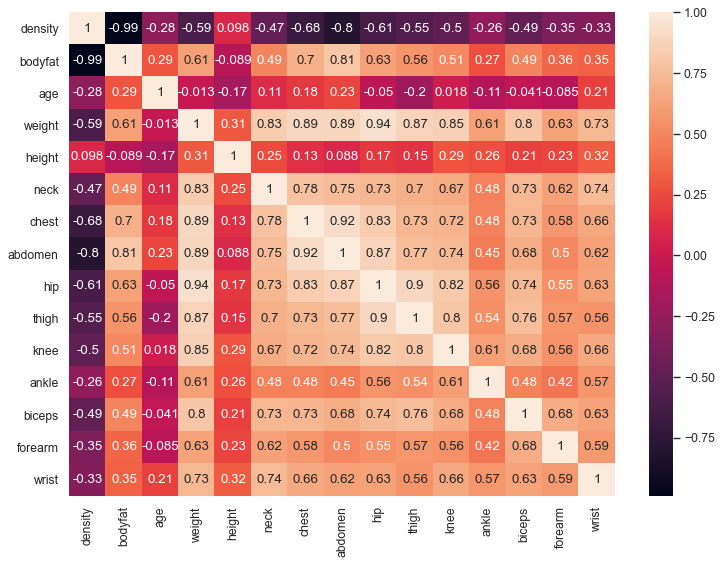

In [31]:
figure(figsize=(11, 8), dpi=80)
sns.heatmap(df.corr(), annot=True,)

<h2>Conclusion:</h2>

At this moment we can mention a few interesting points about our discovery. First of all, despite the huge variety of linear regressions in our tools, the simplest one like "Linear Regression" performs almost better than others.  Sadly, the difference in accuracy score is insignificant, even after we the meaningful play-action with hyperparameters. Secondly, we were able to increase the accuracy by 0.22% by dealing with outliers in the beginning. Thirdly, we have decided to remove less correlated columns from our data set to see how it will affect the result.  Unfortunately, the increase in accuracy was extremely low, so we won't be counting it as a great improvement. Finally, we can state that our model is able to predict the correct result with 99.4% accuracy (important to mention that this result is varied due to the splitting process).